# Merging Data


## GeoJSON


- https://carmengg.github.io/eds-220-book/lectures/lesson-10-merge-data.html
- data stored as attribute-value pairs
- stored like dictionaries
https://geojson.io/

- point
- LineString
- polygon
- 

- shape files can only store one type of vector data (point, line, polygon)
- geoJSON can store multiple



# Merging Data
In this section we will learn how to join dataframes and will apply this to creating a choropleth map with geopandas.



# 12.1 Goal
Our goal in this lesson will be to join two datasets, one with demographic information and another with country outlines, to create the following choropleth map showing the number of Arctic communities by country and their location in [Scandinavia](https://en.wikipedia.org/wiki/Scandinavia):
![Scandinavia](https://carmengg.github.io/eds-220-book/images/arctic-comms.png)

# Joins

- inner join: keeps matching/overlapping values
- left join: keeps all rows from the left dataframe, if there's no match in right df, "na"
- right join: keep right df (can just do left join and swap order)
- full outer join: keep all rows from both,  missing values as "na"s



# 12.2 Data

We will use two datasets in this lesson. The first dataset is [Natural Earth’s medium scale cultural boundaries data (1:50m)](https://www.naturalearthdata.com/downloads/50m-cultural-vectors/). We can obtain this dataset by downloading the shapefile. [Natural Earth](https://www.naturalearthdata.com/) is a public domain dataset with ready-to-use data for creating maps.

The second dataset we will use is a [list of Arctic communities and their location](https://search.dataone.org/view/doi%3A10.18739%2FA28S4JQ80) (Brook, 2023) which can be accessed through the DataONE repository. This is a GeoJSON file with the following attributes:

- **name**: name of Arctic community,
- **population**: population of Arctic community, as of 2022
- **country**: country that the Arctic community falls within (see dataset metadata for the codes)
- **geoname-id**: numeric codes that uniquely identify all administrative/legal and statistical geographic areas for which the Census Bureau tabulates data

# 12.3 Data preparation
We start our analysis by importing the necessary libraries:



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

The Natural Earth dataset has many columns, so we need to update the pandas display settings to show all columns:

In [2]:
# display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

## 12.3.1 Countries

Now we move on to preparing the polygons for the Scandinavian countries. To import the Natural Earth countries polygons we use the `geopandas.read_file()` function again:

In [3]:
# import countries polygons
countries = gpd.read_file('data/ne_50m_admin_0_countries/ne_50m_admin_0_countries.shp')
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_ISO,ADM0_DIFF,ADM0_TLC,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,TLC_DIFF,FCLASS_TLC,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,1,Zimbabwe,ZWE,0,Zimbabwe,ZWE,0,Zimbabwe,ZWE,0,Zimbabwe,Zimbabwe,ZWE,Zimbabwe,None,Zimb.,ZW,Republic of Zimbabwe,None,Zimbabwe,None,None,Zimbabwe,None,1,5,3,9,14645468.0,14,2019,21440,2019,5. Emerging region: G20,5. Low income,ZI,ZW,ZW,ZWE,ZWE,716,716,716,ZW,ZWE,23425004,23425004,Exact WOE match as country,ZWE,None,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,5,-99,1,0.0,2.5,8.0,29.925444,-18.911640,1159321441,Q954,زيمبابوي,জিম্বাবুয়ে,Simbabwe,Zimbabwe,Zimbabue,زیمبابوه,Zimbabwe,Ζιμπάμπουε,זימבבואה,ज़िम्बाब्वे,Zimbabwe,Zimbabwe,Zimbabwe,ジンバブエ,짐바브웨,Zimbabwe,Zimbabwe,Zimbábue,Зимбабве,Zimbabwe,Zimbabve,Зімбабве,زمبابوے,Zimbabwe,津巴布韦,辛巴威,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,1,Zambia,ZMB,0,Zambia,ZMB,0,Zambia,ZMB,0,Zambia,Zambia,ZMB,Zambia,None,Zambia,ZM,Republic of Zambia,None,Zambia,None,None,Zambia,None,5,8,5,13,17861030.0,14,2019,23309,2019,7. Least developed region,4. Lower middle income,ZA,ZM,ZM,ZMB,ZMB,894,894,894,ZM,ZMB,23425003,23425003,Exact WOE match as country,ZMB,None,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,6,6,6,-99,1,0.0,3.0,8.0,26.395298,-14.660804,1159321439,Q953,زامبيا,জাম্বিয়া,Sambia,Zambia,Zambia,زامبیا,Zambie,Ζάμπια,זמביה,ज़ाम्बिया,Zambia,Zambia,Zambia,ザンビア,잠비아,Zambia,Zambia,Zâmbia,Замбия,Zambia,Zambiya,Замбія,زیمبیا,Zambia,赞比亚,尚比亞,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,1,Yemen,YEM,0,Yemen,YEM,0,Yemen,YEM,0,Yemen,Yemen,YEM,Yemen,None,Yem.,YE,Republic of Yemen,None,Yemen,None,None,"Yemen, Rep.",None,5,3,3,11,29161922.0,15,2019,22581,2019,7. Least developed region,4. Lower middle income,YM,YE,YE,YEM,YEM,887,887,887,RY,YEM,23425

<AxesSubplot:>

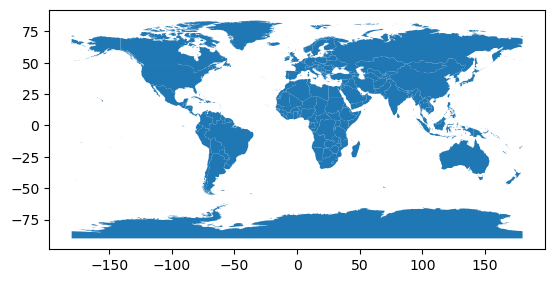

In [4]:
# a quick view
countries.plot()

In [5]:
# reassign the column names: .str.lower() makes them lower case
countries.columns = countries.columns.str.lower()
print(countries.columns)

Index(['featurecla', 'scalerank', 'labelrank', 'sovereignt', 'sov_a3',
       'adm0_dif', 'level', 'type', 'tlc', 'admin',
       ...
       'fclass_tr', 'fclass_id', 'fclass_pl', 'fclass_gr', 'fclass_it',
       'fclass_nl', 'fclass_se', 'fclass_bd', 'fclass_ua', 'geometry'],
      dtype='object', length=169)


In [6]:
# we don't want all of these columns

# remember: the geometry column has the polygons for each country
countries_sub = countries[['admin', 'type', 'geometry']]
countries_sub.head()

,admin,type,geometry
0,Zimbabwe,Sovereign country,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Zambia,Sovereign country,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Yemen,Sovereign country,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Vietnam,Sovereign country,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Venezuela,Sovereign country,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


## 12.3.2 Arctic communities

In the same way as we previously used pandas.read_csv(), we can read in the Arctic communities data directly from the data repository using geopandas.read_file():

In [7]:
# read in Arctic communities data
communities = gpd.read_file('https://cn.dataone.org/cn/v2/resolve/urn%3Auuid%3Aed7718ae-fb0d-43dd-9270-fbfe80bfc7a4')
communities.head()

,name,population,country,geoname-id,geometry
0,Udomlya,32373,RU,452949,POINT (34.99250 57.87944)
1,Valmiera,26963,LV,453754,POINT (25.42751 57.54108)
2,Ventspils,42644,LV,454310,POINT (21.57288 57.38988)
3,Vec-Liepāja,85260,LV,454432,POINT (21.01667 56.53333)
4,Tukums,18348,LV,454768,POINT (23.15528 56.96694)


Notice that the `countries` and `communities` GeoDataFrames both have the same crs:

In [8]:
print(countries.crs)

epsg:4326


In [9]:
print(communities.crs)

epsg:4326


In [10]:
countries.crs == communities.crs

True

This makes it easy to take a quick look at our communities data by plotting it on top of the countries dataframe:

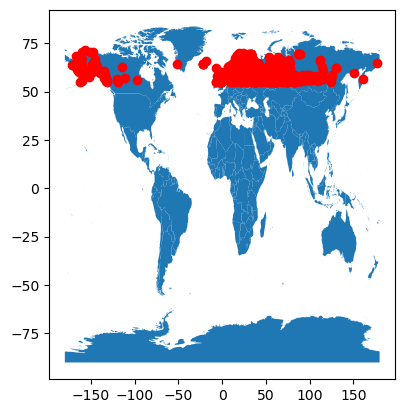

In [11]:
fig, ax = plt.subplots()
countries.plot(ax=ax)
communities.plot(ax=ax, color='red')
plt.show()

Next, we want to calculate the number of Arctic communities by country.

In [12]:
communities.groupby('country').count()

,name,population,geoname-id,geometry
country,,,,
AX,1,1,1,1
BY,8,8,8,8
CA,7,7,7,7
DK,72,72,72,72
EE,14,14,14,14
FI,98,98,98,98
FO,1,1,1,1
GB,96,96,96,96
GL,1,1,1,1


In [13]:
# calculate number of communities by country

# extract number of communities by country as a pd.Series
n_comms = communities.groupby('country').count().name

# convert the pd.Series into a pd.DataFrame and update it
n_comms = pd.DataFrame(n_comms).rename(columns={'name':'n_communities'}).reset_index()

Let’s break this down a bit:

- We start with our `communities` dataframe and use `groupby('country')` to group by country code,
- then we use `count()` as an aggregator function to count how many rows belong to each country code.
- The result of this operation is a dataframe (run `communities.groupby('country').count()` to check) and we select a single column with the counts by selecting the `name` column.
- The result is a single `pd.Series` in the variable `n_comms`.
- We then convert this `pd.Series` into a `pd.DataFrame` and clean it up a bit.

In [14]:
n_comms

,country,n_communities
0,AX,1
1,BY,8
2,CA,7
3,DK,72
4,EE,14
5,FI,98
6,FO,1
7,GB,96
8,GL,1
9,IS,5


Since we only want data from Scandinavia, we can use the codes for these countries to locate these rows:

In [15]:
# select Scandinavia data
scandi_codes = ['DK', 'NO', 'SE', 'FO', 'FI', 'IS', 'AX']


In [16]:
scandi_n_comms = n_comms[n_comms.country.isin(scandi_codes)].copy()
scandi_n_comms

,country,n_communities
0,AX,1
3,DK,72
5,FI,98
6,FO,1
9,IS,5
12,NO,48
14,SE,133


# 12.4 Merge Datasets
To merge two datasets they need to have at least one column in common. Currently our datasets do not have any columns in common:

In [17]:
countries_sub.head(2)

,admin,type,geometry
0,Zimbabwe,Sovereign country,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Zambia,Sovereign country,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."


In [18]:
scandi_n_comms.head(2)

,country,n_communities
0,AX,1
3,DK,72


We can easily fix this by adding an `admin` column to `scandi_n_comms`:

In [19]:
# Add country names
# alphabetically ordered, bc already automatically alphabetically ordered earlier!
scandi_names = ['Aland Islands', # AX
                'Denmark', # DK
                'Finland', # FI
                'Faroe Islands', # FO
                'Iceland', # IS
                'Norway', # NO
                'Sweden' # SE
               ]
scandi_n_comms['admin'] = scandi_names
scandi_n_comms

,country,n_communities,admin
0,AX,1,Aland Islands
3,DK,72,Denmark
5,FI,98,Finland
6,FO,1,Faroe Islands
9,IS,5,Iceland
12,NO,48,Norway
14,SE,133,Sweden


To merge dataframes we can use the `pandas.merge()` [function](https://pandas.pydata.org/docs/reference/api/pandas.merge.html#pandas.merge). The basic syntax for it is:

```
output_df = pd.merge(left_df, 
                    right_df,
                    how = type_of_join,
                    on = column_to_join
                    )

```
where

- `output_df` is the dataframe resulting from the merge,
- `left_df` is the dataframe we have “on the left side”,
- `right_df` is the dataframe we have “on the right side”,
- `how` specifies the type of join between the left and right dataframes, ([check the options here](https://pandas.pydata.org/docs/reference/api/pandas.merge.html#pandas.merge)), the default is to do an inner join,
- `on` specifies the column to join on, this column must be present in both our dataframes.


In our case we want to perform an inner join between our dataframes. This will merge the subset of rows that have matches in both the left table and the right table.

![R for Data Science, Whickham & Grolemund](https://carmengg.github.io/eds-220-book/images/merging_data/join-diagrams-inner.png)

In [20]:
# merge dataframes
scandi_countries = pd.merge(countries_sub,
                            scandi_n_comms,
                            how='inner', # inner join, only keep rows w matches in both
                            on='admin' # column to join by/on
                           )

# update index
scandi_countries = scandi_countries.set_index('admin')
scandi_countries

,type,geometry,country,n_communities
admin,,,,
Sweden,Sovereign country,"MULTIPOLYGON (((19.07646 57.83594, 18.99375 57...",SE,133
Norway,Sovereign country,"MULTIPOLYGON (((20.62217 69.03687, 20.49199 69...",NO,48
Iceland,Sovereign country,"POLYGON ((-15.54312 66.22852, -15.42847 66.224...",IS,5
Finland,Country,"MULTIPOLYGON (((24.15547 65.80527, 24.04902 65...",FI,98
Faroe Islands,Dependency,"MULTIPOLYGON (((-6.62319 61.80596, -6.64277 61...",FO,1
Denmark,Country,"MULTIPOLYGON (((12.56875 55.78506, 12.57119 55...",DK,72


Notice that the row for Aland Islands is not present in the merged dataframe. We can verify the value ‘Aland Islands’ was nowhere in our original countries dataframe like this:

In [21]:
# check Aland Islands is nowhere in data frame
'Aland Islands' in countries.values

False

The `values` attribute of a dataframe returns all the values in the dataframe as an array:

In [22]:
# the underlying values of the dataframe
countries.values

array([['Admin-0 country', 1, 3, ..., None, None,
        <POLYGON ((31.3 -22.4, 31.2 -22.3, 31.1 -22.3, 30.9 -22.3, 30.7 -22.3, 30.5 ...>],
       ['Admin-0 country', 1, 3, ..., None, None,
        <POLYGON ((30.4 -15.6, 30.3 -15.6, 30 -15.6, 29.7 -15.6, 29.5 -15.7, 29.3 -1...>],
       ['Admin-0 country', 1, 3, ..., None, None,
        <MULTIPOLYGON (((53.1 16.6, 52.6 16.5, 52.4 16.4, 52.3 16.3, 52.2 16.2, 52.2...>],
       ...,
       ['Admin-0 country', 3, 4, ..., None, None,
        <MULTIPOLYGON (((-45.7 -60.5, -45.5 -60.5, -45.4 -60.6, -45.4 -60.6, -45.2 -...>],
       ['Admin-0 country', 3, 6, ..., None, None,
        <POLYGON ((-63.1 18.1, -63 18.1, -63 18, -63 18, -63.1 18, -63.1 18.1, -63.1...>],
       ['Admin-0 country', 5, 6, ..., None, None,
        <POLYGON ((179 -8.52, 179 -8.53, 179 -8.53, 179 -8.51, 179 -8.49, 179 -8.47,...>]],
      dtype=object)

The Aland Islands is an autonomous region of Finland and there is one Arctic community registered in this region. We will directly add one to Finland to not lose this piece of data:

In [23]:
scandi_countries.at['Finland', 'n_communities'] += 1 # only run this once!!

print(scandi_countries.at['Finland', 'n_communities'])

99


# 12.5 Chloropleth map

A [choropleth](https://en.wikipedia.org/wiki/Choropleth_map) map is an efficient way to visualize aggregate data per region.

To make a choropleth map from our polygons `GeoDataFrame` we need to specify the column parameter in `plot()` and make it equal to the column with the values we want to plot in each country.

<AxesSubplot:>

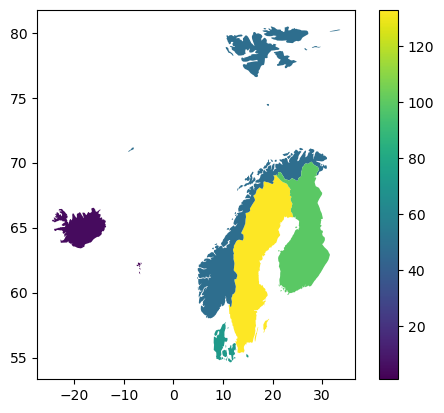

In [24]:
scandi_countries.plot(column='n_communities',
                      legend=True
                     )

To finish, we can use `matplotlib` to customize our map:

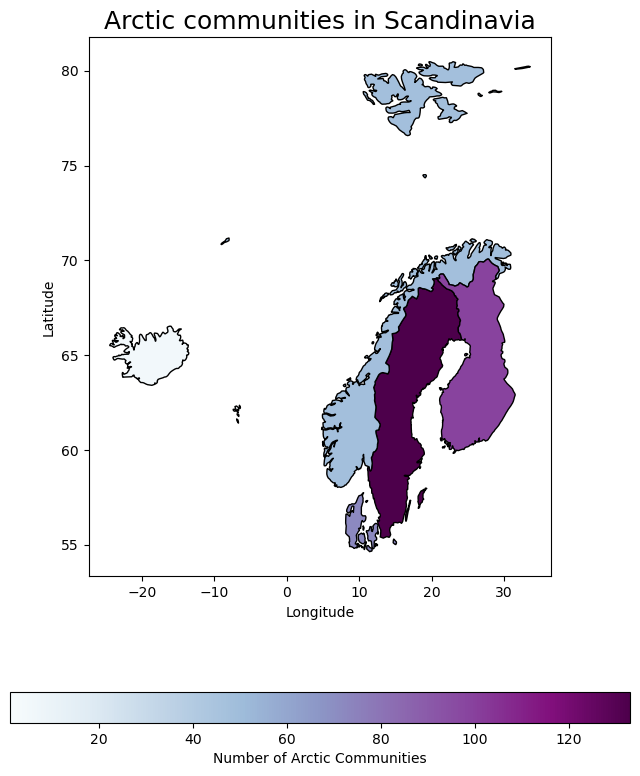

In [25]:
fig, ax = plt.subplots(figsize=(10,10))

scandi_countries.plot(ax=ax,
                      column='n_communities',
                      cmap='BuPu',
                      legend=True,
                      edgecolor='black',
                      legend_kwds={'shrink':.8,
                                   'label': 'Number of Arctic Communities',
                                   'orientation': 'horizontal'
                                  }
                     )

ax.set_title('Arctic communities in Scandinavia', fontsize=18)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

# 12.6 Complete workflow

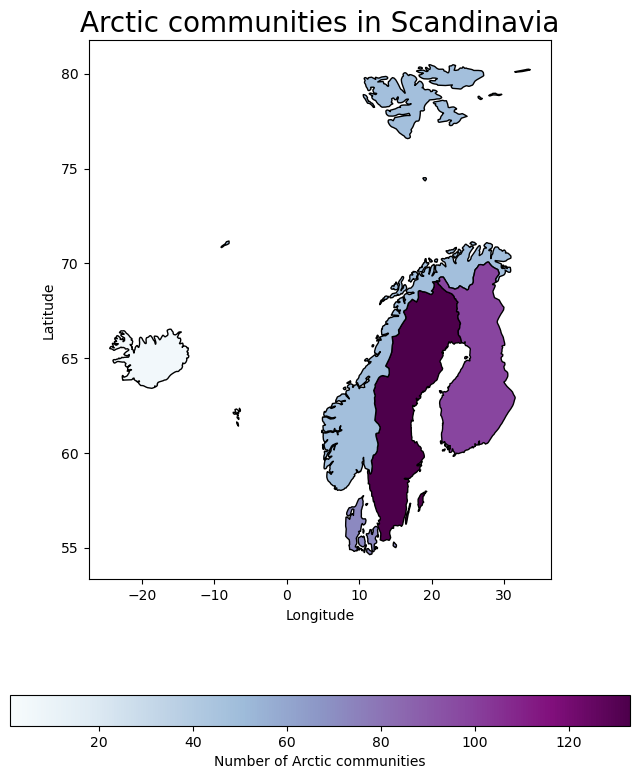

In [27]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd

# ======= IMPORT DATA ========
# read in Arctic communities data
communities = gpd.read_file('https://cn.dataone.org/cn/v2/resolve/urn%3Auuid%3Aed7718ae-fb0d-43dd-9270-fbfe80bfc7a4')

# import countries polygons
countries = gpd.read_file('data/ne_50m_admin_0_countries/ne_50m_admin_0_countries.shp')
countries.head()

# ======= COMMUNITIES PREPARATION =======
# extract number of communities by country as a pd.Series
n_comms = communities.groupby('country').count().name

# convert the pd.Series into a pd.DataFrame and update it
n_comms = pd.DataFrame(n_comms).rename(columns={'name':'n_communities'}).reset_index()

# select Scandinavia data
scandi_codes = ['DK','NO','SE','FO','FI','IS','AX']
scandi_n_comms = n_comms[n_comms.country.isin(scandi_codes)].copy()

# ======= COUNTRIES PREPARATION =======
# make column names lower case
countries.columns = countries.columns.str.lower()

# names of Scandinavian countries
scandi_names = ['Aland Islands',
                'Denmark',
                'Finland',
                'Faroe Islands',
                'Iceland',
                'Norway',
                'Sweden']

# subset Scandinavian countries
scandi_countries = countries.loc[countries.admin.isin(scandi_names),['admin','type','geometry']]

# ======= MERGE DATASETS =======
scandi_n_comms['admin'] = scandi_names
scandi_countries = pd.merge(scandi_countries, scandi_n_comms)

# ======= CREATE MAP =======
fig, ax = plt.subplots(figsize=(10, 10))

scandi_countries.plot(ax=ax,
                      column='n_communities',
                       cmap='BuPu',
                       legend=True,
                       edgecolor='black',
                       legend_kwds={'shrink':.8,
                                    'label': 'Number of Arctic communities', 
                                    'orientation': 'horizontal'
                                    }
                       )


ax.set_title('Arctic communities in Scandinavia',  fontsize=20)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

# 12.7 References

Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.

Mike Brook. (2023). Approximate Arctic Communities and Populations, (latitude >= 55, 2022). Arctic Data Center. doi:10.18739/A28S4JQ80.